In [437]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [438]:
df=pd.read_csv("Cars93.csv")
df.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [439]:
df=df.drop(["Unnamed: 0"],axis=1)

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
Manufacturer          93 non-null object
Model                 93 non-null object
Type                  93 non-null object
Min.Price             93 non-null float64
Price                 93 non-null float64
Max.Price             93 non-null float64
MPG.city              93 non-null int64
MPG.highway           93 non-null int64
AirBags               93 non-null object
DriveTrain            93 non-null object
Cylinders             93 non-null object
EngineSize            93 non-null float64
Horsepower            93 non-null int64
RPM                   93 non-null int64
Rev.per.mile          93 non-null int64
Man.trans.avail       93 non-null object
Fuel.tank.capacity    93 non-null float64
Passengers            93 non-null int64
Length                93 non-null int64
Wheelbase             93 non-null int64
Width                 93 non-null int64
Turn.circle           93 non-null int64


checking missing values

In [441]:
df.isnull().sum()

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

 missing values droped

In [442]:
df=df.dropna()

separation of categorical and continuous variables

In [443]:
cat=[]
con=[]
for i in df.columns:
    if(df[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

Label Encoding on categorical features

In [444]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat:
    df[i]=le.fit_transform(df[i])

In [445]:
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,0,43,3,12.9,15.9,18.8,25,31,2,1,...,5,177,102,68,37,26.5,11.0,2705,1,0
1,0,50,2,29.2,33.9,38.7,18,25,0,1,...,5,195,115,71,38,30.0,15.0,3560,1,1
2,1,8,0,25.9,29.1,32.3,20,26,1,1,...,5,180,102,67,37,28.0,14.0,3375,1,3
3,1,0,2,30.8,37.7,44.6,19,26,0,1,...,6,193,106,70,37,31.0,17.0,3405,1,2
4,2,5,2,23.7,30.0,36.2,22,30,1,2,...,4,186,109,69,39,27.0,13.0,3640,1,4


Exploratory data analysis

In [446]:
df.corr()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
Manufacturer,1.000000,-0.061473,0.085822,-0.169941,-0.158644,-0.144012,0.187404,0.185829,0.197127,-0.162563,...,-0.292068,-0.331062,-0.347534,-0.328845,-0.285741,-0.200010,-0.172877,-0.295831,0.345230,0.995420
Model,-0.061473,1.000000,0.234483,-0.164781,-0.200860,-0.220469,0.141562,0.095692,0.154333,-0.181935,...,-0.028157,-0.064265,-0.121645,0.000140,0.034808,-0.109015,-0.145335,-0.116707,-0.172136,-0.029418
Type,0.085822,0.234483,1.000000,-0.283736,-0.253799,-0.219929,0.322559,0.260670,0.175777,-0.122142,...,-0.586348,-0.440375,-0.498943,-0.217627,-0.305040,-0.578785,-0.434876,-0.373033,0.092518,0.095660
Min.Price,-0.169941,-0.164781,-0.283736,1.000000,0.971345,0.910395,-0.662646,-0.663767,-0.585407,0.384867,...,0.326671,0.610621,0.676208,0.543632,0.478258,0.417725,0.413485,0.777454,0.067758,-0.172102
Price,-0.158644,-0.200860,-0.253799,0.971345,1.000000,0.982636,-0.621572,-0.625925,-0.594510,0.371079,...,0.273617,0.552085,0.628365,0.495078,0.424863,0.342068,0.366569,0.737489,0.105914,-0.159089
Max.Price,-0.144012,-0.220469,-0.219929,0.910395,0.982636,1.000000,-0.565159,-0.571861,-0.578274,0.345501,...,0.221675,0.484741,0.566268,0.437816,0.366089,0.268784,0.315315,0.677127,0.130532,-0.143107
MPG.city,0.187404,0.141562,0.322559,-0.662646,-0.621572,-0.565159,1.000000,0.945271,0.440017,-0.303139,...,-0.462627,-0.724826,-0.671131,-0.694484,-0.653703,-0.335389,-0.494894,-0.835735,0.279043,0.201337
MPG.highway,0.185829,0.095692,0.260670,-0.663767,-0.625925,-0.571861,0.945271,1.000000,0.413792,-0.260079,...,-0.414048,-0.617243,-0.570155,-0.587730,-0.558755,-0.277414,-0.371629,-0.776756,0.195829,0.195418
AirBags,0.197127,0.154333,0.175777,-0.585407,-0.594510,-0.578274,0.440017,0.413792,1.000000,-0.301512,...,-0.247654,-0.503548,-0.535277,-0.568454,-0.537274,-0.228272,-0.289008,-0.597587,0.072957,0.205299
DriveTrain,-0.162563,-0.181935,-0.122142,0.384867,0.371079,0.345501,-0.303139,-0.260079,-0.301512,1.000000,...,0.094141,0.439777,0.462056,0.452735,0.301135,0.153610,0.279339,0.397211,-0.072370,-0.156651


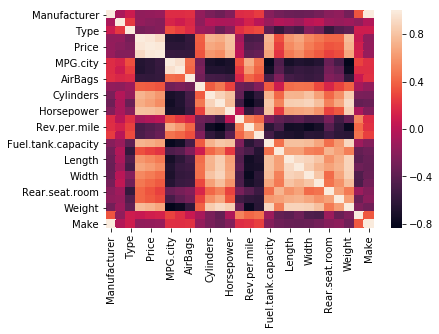

In [447]:
sb.heatmap(df.corr())

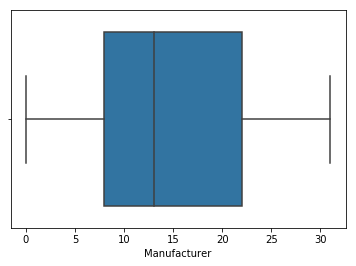

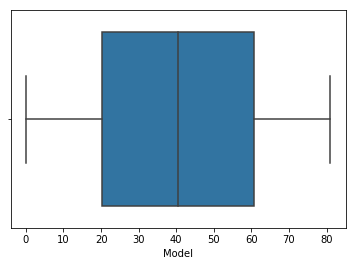

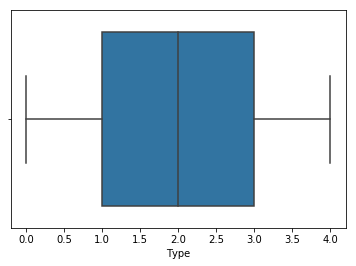

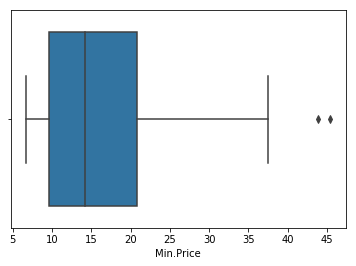

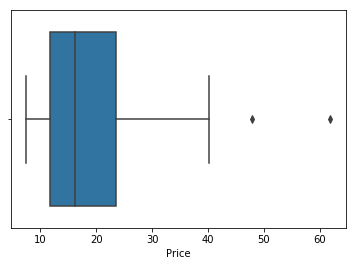

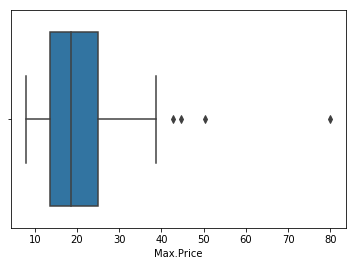

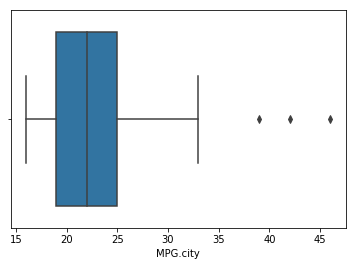

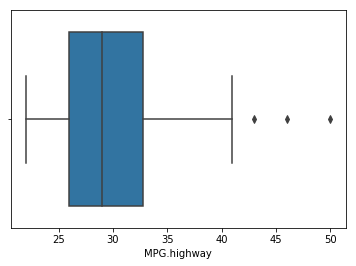

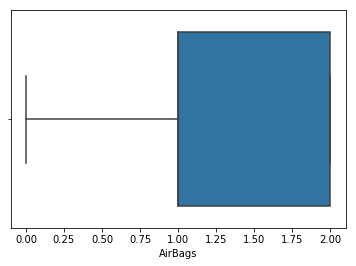

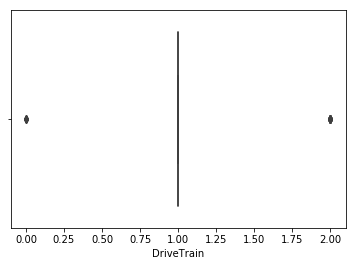

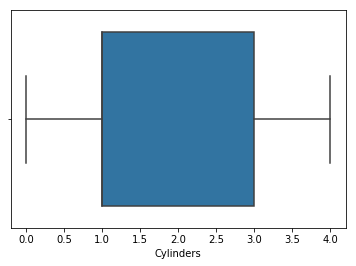

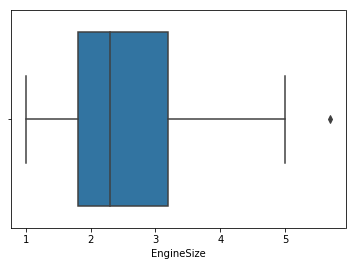

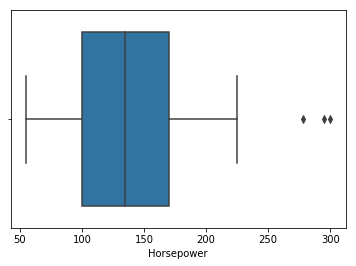

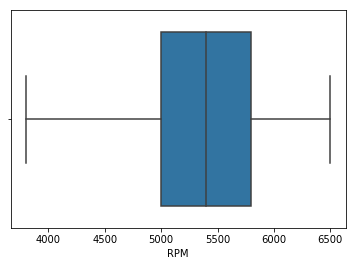

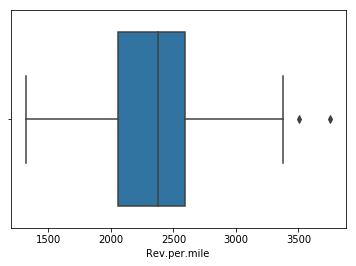

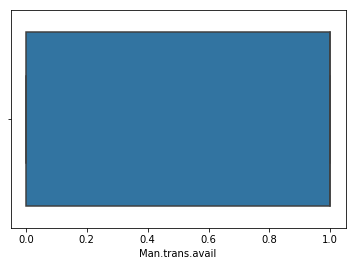

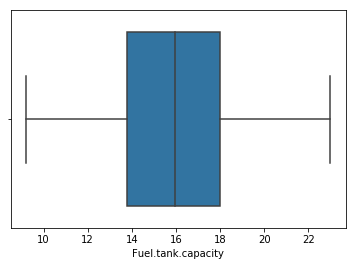

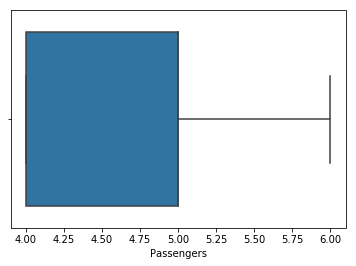

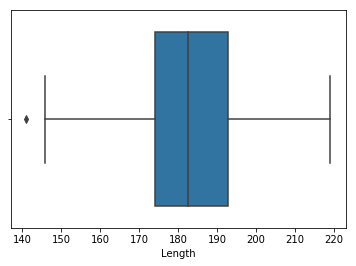

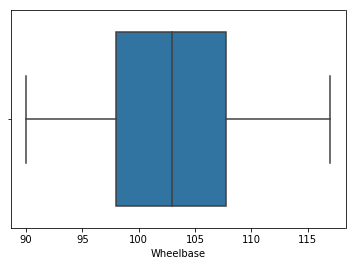

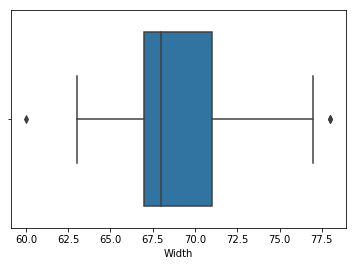

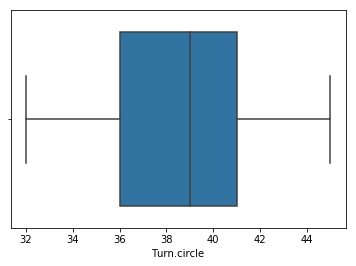

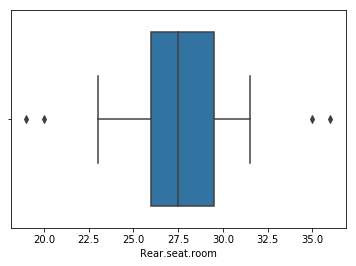

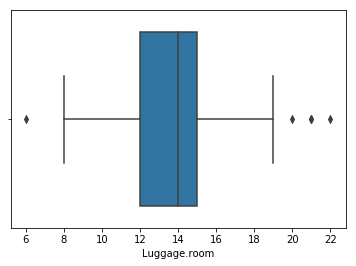

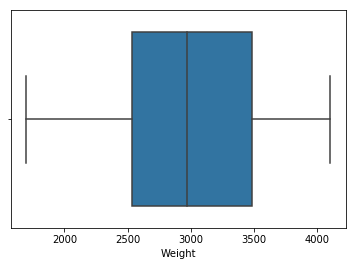

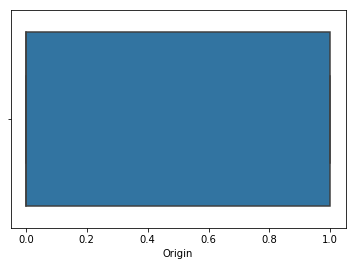

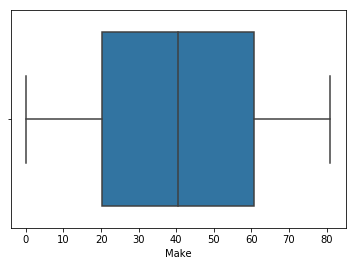

In [448]:
for i in df.columns:
    sb.boxplot(df[i])
    plt.show()

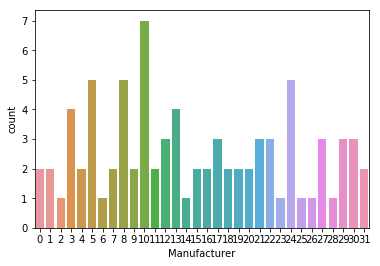

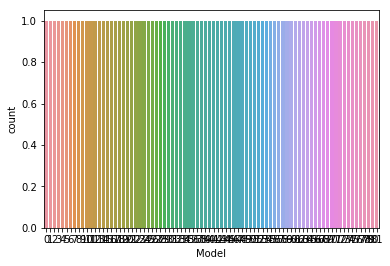

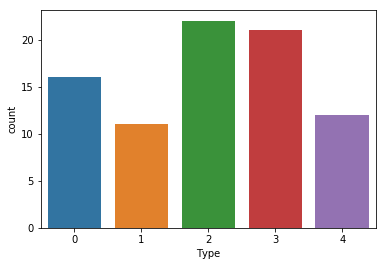

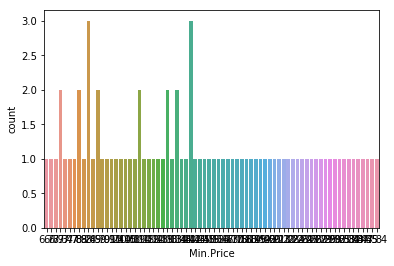

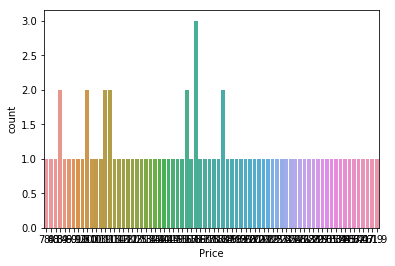

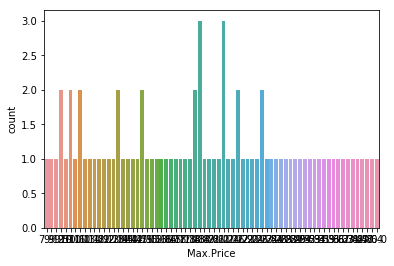

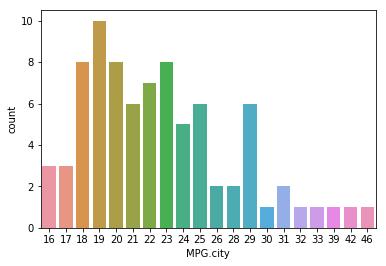

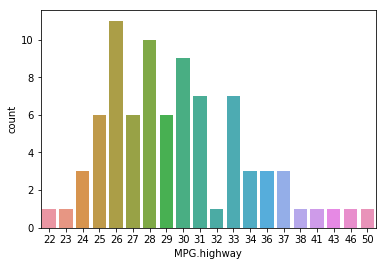

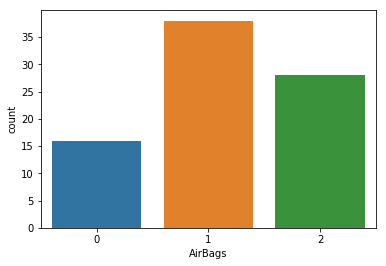

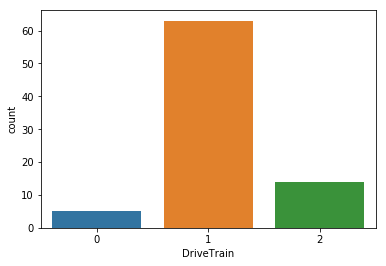

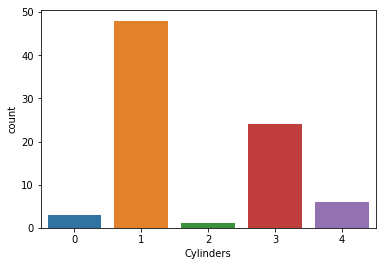

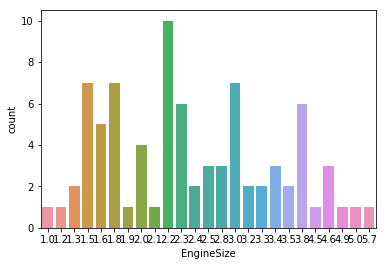

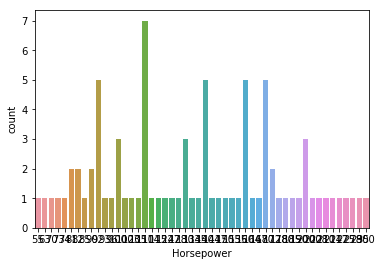

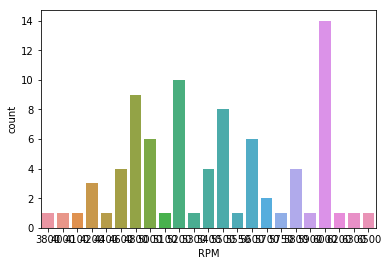

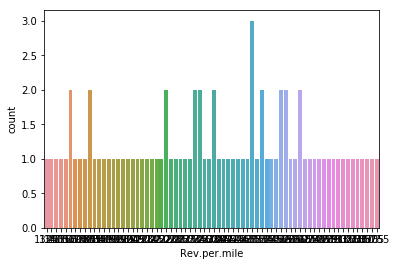

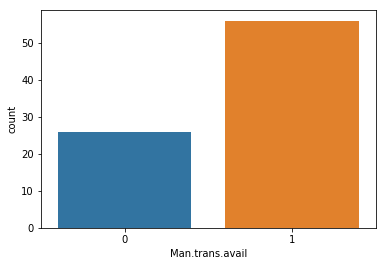

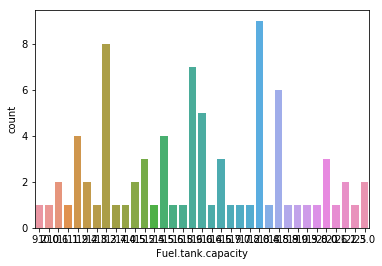

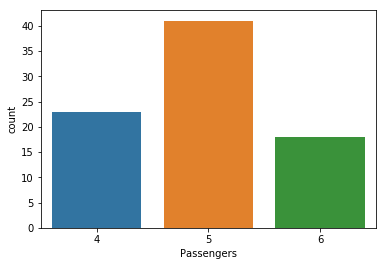

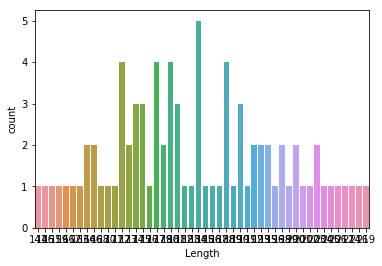

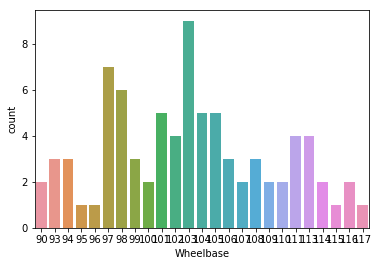

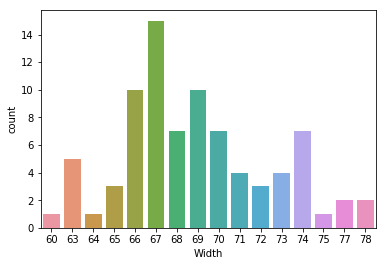

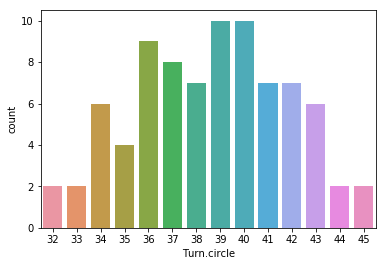

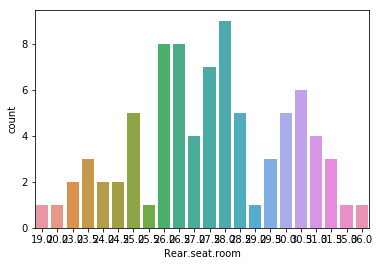

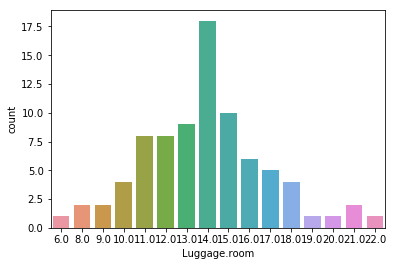

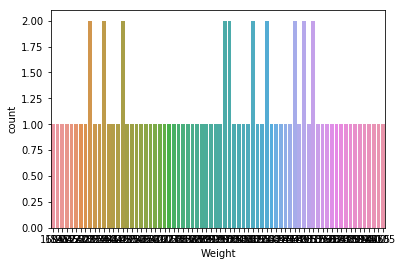

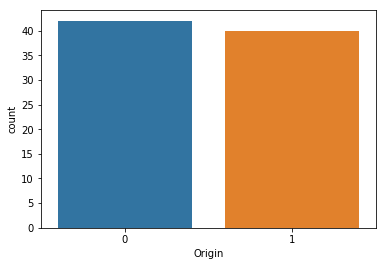

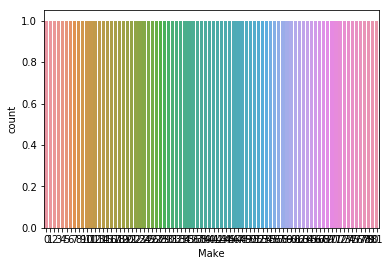

In [449]:
for i in df.columns:
    sb.countplot(df[i])
    plt.show()

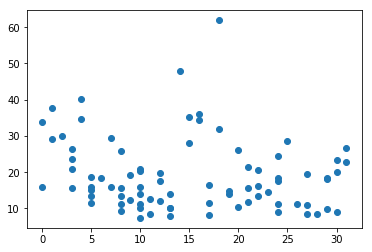

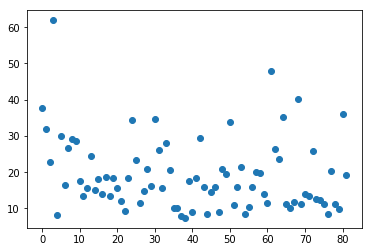

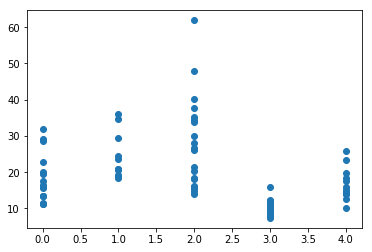

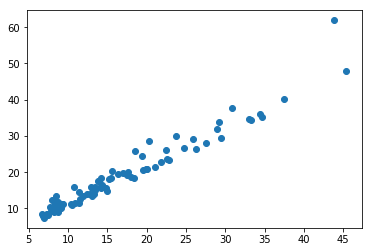

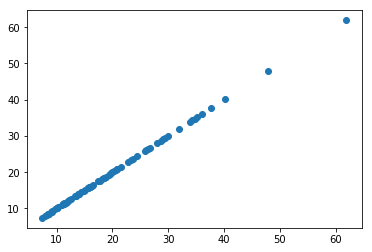

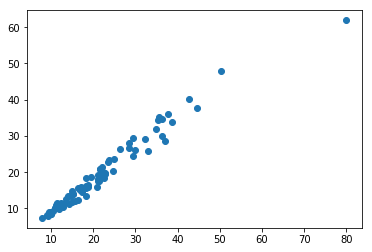

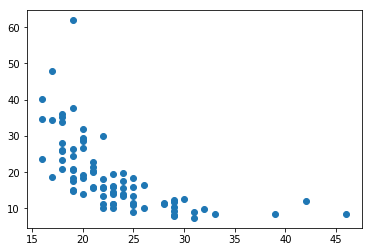

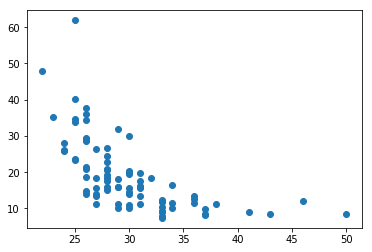

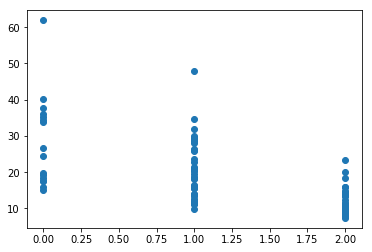

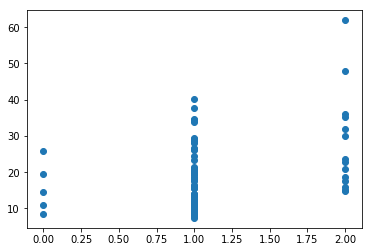

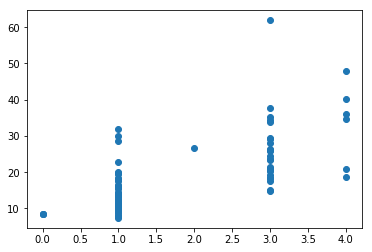

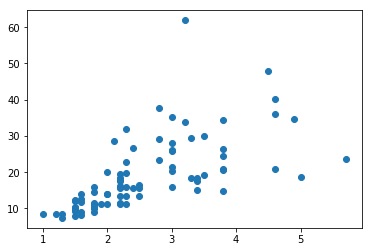

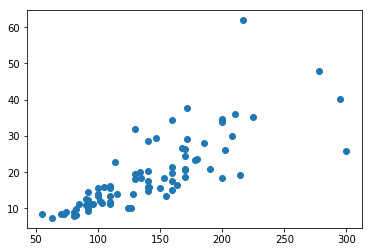

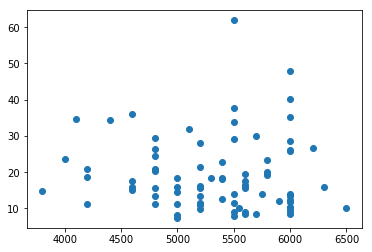

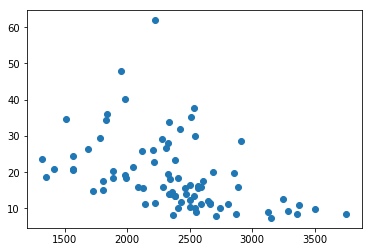

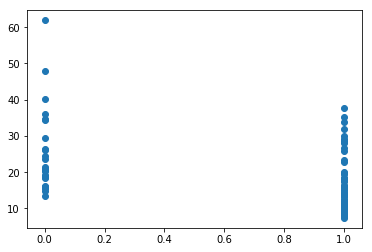

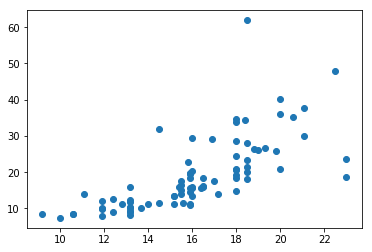

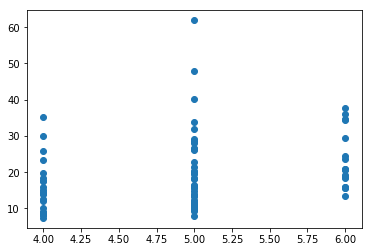

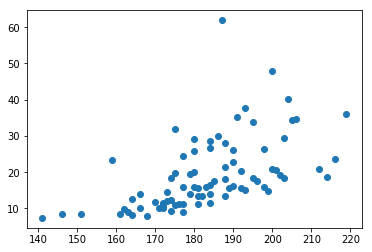

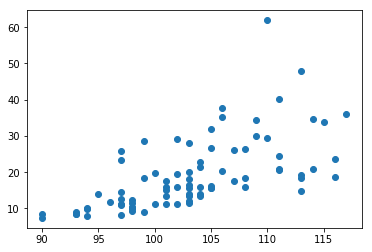

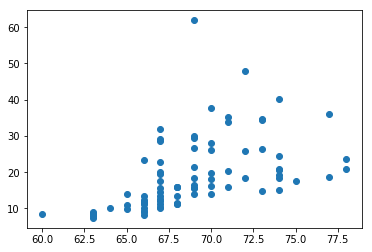

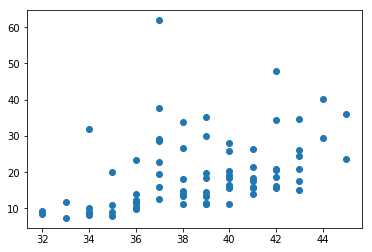

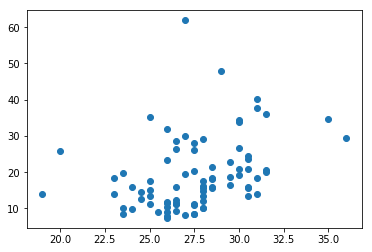

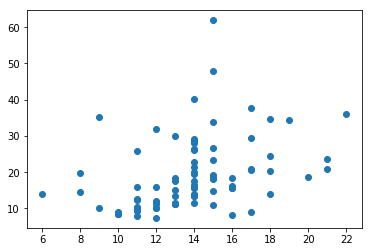

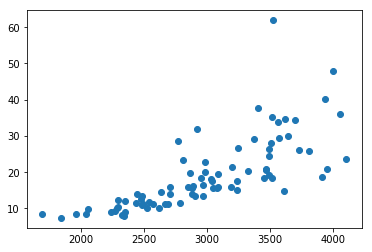

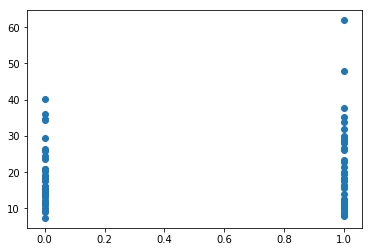

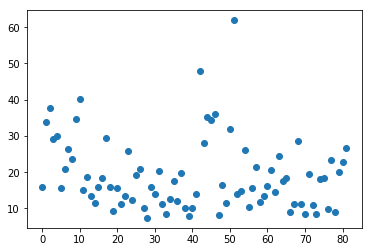

In [450]:
for i in df.columns:
    plt.scatter(df[i],df["Price"])
    plt.show()

Data modeling

In [451]:
X=df.drop(["Price"],axis=1)
Y=df[["Price"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)

In [452]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(xtrain,ytrain)
lr_pred=model.predict(xtest)

In [453]:
MSE_lr=mean_squared_error(ytest,lr_pred)

In [454]:
MSE_lr

0.0007823095572277458

In [455]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor(max_depth=3)
model=dtc.fit(xtrain,ytrain)
dtc_pred=model.predict(xtest)

In [456]:
MSE_dtc=mean_squared_error(ytest,dtc_pred)

In [457]:
MSE_dtc

17.616290156062426

In [458]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=60)
model=rf.fit(xtrain,ytrain)
rf_pred=model.predict(xtest)

C:\Users\Hitesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [459]:
MSE_rf=mean_squared_error(ytest,rf_pred)

In [460]:
MSE_rf

3.3941794117647177

In [461]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
abc=AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=50)
model=abc.fit(xtrain,ytrain)
abc_pred=model.predict(xtest)

C:\Users\Hitesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [462]:
MSE_abc=mean_squared_error(ytest,abc_pred)

In [463]:
MSE_abc

9.730331546123203

In [464]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=8)
model=knn.fit(xtrain,ytrain)
knn_pred=model.predict(xtest)

In [465]:
MSE_knn=mean_squared_error(ytest,knn_pred)

In [466]:
MSE_knn

35.11371323529412

In [467]:
from sklearn.model_selection import GridSearchCV
tp={"n_neighbors":range(2,10)}
cv=GridSearchCV(knn,tp,scoring="neg_mean_squared_error",cv=4)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'n_neighbors': 8}

In [468]:
Regressor=["LinearRegression","DecisionTree","Random_forest","Adaptive_boosting","KNN"]
MSE=[MSE_lr,MSE_dtc,MSE_rf,MSE_abc,MSE_knn]

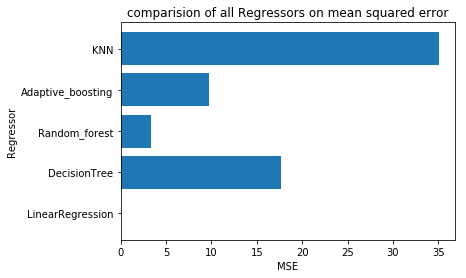

In [469]:
plt.barh(Regressor,MSE)
plt.title("comparision of all Regressors on mean squared error")
plt.xlabel("MSE")
plt.ylabel("Regressor")
plt.show()

# Here Linear Regression is the best model to predict Price because it has very low mean_squared_error